<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Algoritmo-Gen-tico-DEAP/blob/main/Algoritmo_Gen%C3%A9tico_DEAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
# FAZER A INSTALAÇÃO DA BIBLIOTECA
!pip install deap

In [340]:
# IMPORTAR AS BIBLIOTECAS BÁSICAS
import numpy as np
import matplotlib.pyplot as plt

# IMPORTAR AS BIBLIOTECAS DE MACHINE LEARNING
from deap import creator
from deap import base
from deap import tools
from deap import algorithms

In [341]:
# REGISTRO
# 'toolbox' = FERRAMENTA, ONDE SERÁ REGISTRADO OS OBJETIVOS E ELEMENTOS DO ALGORITMO GENÉTICO
toolbox = base.Toolbox()

# NÚMEROS DE GENES
n = 4

# CRIAÇÃO DA APTIDÃO DE MINIMIZAÇÃO, MAXIMIZAÇÃO, E MÚLTIPLOS OBJETIVOS 
# OBS: 'WEIGHT' É O PESO QUE SERÁ USADO, E O PESO É LIDO EM PORCENTAGEM
creator.create('FitnessMin', base.Fitness,weights=(-1.0,))

# CRIAÇÃO DOS CROMOSSOMOS, DEFINO COMO OS INDIVÍDUOS VÃO SER REPRESENTADOS 
# DEFINO COMO 'LISTA' E CADA LISTA REPRESENTA UM GENE
creator.create('EstruturaIndividuo',list, fitness = creator.FitnessMin)

# PERMUTAÇÃO DOS ELEMENTOS
# REGISTRO DO NÚMERO DE GENES
toolbox.register('Genes', np.random.permutation, n)

# REGISTRO DE INDIVÍDUOS
# REGISTRAR OS CROMOSSOMOS DOS INDIVÍDUOS
toolbox.register('Individuos', tools.initIterate, creator.EstruturaIndividuo, toolbox.Genes)

# REGISTRO DA POPULAÇÃO
# SERÁ UMA LISTA DE INDIVÍDUOS
toolbox.register('Populaçao', tools.initRepeat, list, toolbox.Individuos)

# NÚMERO DE POPULAÇÃO
pop = toolbox.Populaçao (n=10)

# REGISTRO DE OPERADORES
# TIPOS: CROSSOVER, MUTATION, E SELECTION

toolbox.register('mate', tools.cxPartialyMatched)
# REALIZA TROCAS NO SENTIDO DE PAI1 PARA PAI2 E DEPOIS NO SENTIDO INVERSO, DE PAI 2 PARA PAI1, PARA EVITAR CROMOSSOMOS INVÁLIDOS
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.1)
# TROCA O ELEMENTO DA POSIÇÃO i COM O ELEMENTOS DA POSIÇÃO j, PROBABILIDADE DE MUTAÇÃO DO GENE DEFINI COMO 10%
toolbox.register('select', tools.selTournament, tournsize = 2)
# SELEÇÃO POR TORNEIO 

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'EstruturaIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [342]:
# MATRIX ORIGEM DESTINO
dist = [[0, 7, 9, 2],
        [4, 0, 3, 7],
        [6, 7, 0, 8],
        [2, 3, 8, 0]]

In [343]:
# FUNÇÃO DE APTIDÃO
def aptidao (Individuos):
  f = 0
  for i in range (n-1):
    local1 = Individuos[i]
    local2 = Individuos[i + 1]
    distancia = dist[local1][local2]
    f = f + distancia

  return f,
# IMPORTÂNCIA DA VÍRGULA: TEMOS QUE RETORNAR UMA APTIDÃO MULTI OBJETIVO

In [344]:
# REGISTRO DA EVOLUÇÃO DA APTIDÃO DE CADA INDIVÍDUO A CADA GERAÇÃO
toolbox.register('evaluate', aptidao)

In [345]:
# SALVAR OS MELHORES INDIVÍDUOS E APTIDÃO A CADA GERAÇÃO
# SALVAR ATRAVÉS DO MÓDULO DE ESTATÍSTICA
def EstatisticaSalvar (Individuos):
  return Individuos.fitness.values

In [346]:
# REGISTRAR A ESTATÍSTICA A SER SALVA
# SALVAR A ESTATÍSTICA DA MÉDIA, MÍNIMA E MÁXIMA DE CADA INDIVÍDUO
estatistica = tools.Statistics (EstatisticaSalvar)
estatistica.register ('mean', np.mean)
estatistica.register ('min', np.min)
estatistica.register ('max', np.max)

In [347]:
# DEFINIR QUANTOS VALORES ÓTIMOS DEVO SALVAR NA LISTA
# OU EM OUTRAS PALAVRAS, QUANTOS DOS MELHORES O ALGORITMO DEVE SALVAR
geraçao = tools.HallOfFame(1)

In [348]:
# EXECUTAR O ALGORITMO GENÉTICO
# pop = POPULAÇÃO / toolbox = toolbox / cxpb = PROBABILIDADE DE CROSSOVER / mutpb = PROBABILIDADE DE MUTAÇÃO
# stats = ESTATÍSTICA / ngen = NÚMERO DE GERAÇÕES / halloffame = halloffame / verbose = IMPRIMIR RESULTADO AO LONGO DA EXECUÇÃO
result, log = algorithms.eaSimple (pop, 
                                  toolbox,
                                  cxpb= 0.8, 
                                  mutpb= 0.1,
                                  stats=estatistica,
                                  ngen= 100,
                                  halloffame=geraçao, 
                                  verbose=True)

gen	nevals	mean	min	max
0  	10    	16.5	8  	22 
1  	6     	14.9	8  	22 
2  	6     	14.4	8  	21 
3  	8     	15.3	8  	22 
4  	9     	12.6	8  	19 
5  	8     	11.9	8  	21 
6  	10    	9.4 	8  	15 
7  	8     	11.2	8  	23 
8  	8     	10.5	8  	23 
9  	6     	9.5 	8  	23 
10 	10    	8   	8  	8  
11 	8     	8   	8  	8  
12 	10    	8   	8  	8  
13 	8     	8   	8  	8  
14 	10    	8   	8  	8  
15 	9     	8.9 	8  	17 
16 	9     	10.3	8  	22 
17 	6     	8   	8  	8  
18 	6     	8   	8  	8  
19 	9     	8   	8  	8  
20 	8     	9.4 	8  	22 
21 	8     	8   	8  	8  
22 	6     	8   	8  	8  
23 	7     	8   	8  	8  
24 	8     	8   	8  	8  
25 	10    	9   	8  	18 
26 	8     	8   	8  	8  
27 	9     	9.4 	8  	18 
28 	8     	10.4	8  	22 
29 	10    	8   	8  	8  
30 	8     	8   	8  	8  
31 	8     	8   	8  	8  
32 	8     	9   	8  	18 
33 	6     	8   	8  	8  
34 	6     	8   	8  	8  
35 	6     	8   	8  	8  
36 	8     	8   	8  	8  
37 	10    	8   	8  	8  
38 	8     	8   	8  	8  
39 	10    	8   	8  	8  
40 	5     	8   	

In [349]:
# MOSTRAR O RESULTADO DAS MELHORES POPULAÇÕES
print(result)

[[0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2]]


In [350]:
# MOSTRAR O MELHOR INDIVÍDUO
print(geraçao)

[[0, 3, 1, 2]]


In [351]:
# MOSTRAR A MELHOR APTIDÃO
melhor = geraçao[0]
print(melhor)
aptidao(melhor)

[0, 3, 1, 2]


(8,)

In [352]:
# MOSTRAR O LOG A CADA GERAÇÃO
log

[{'gen': 0, 'max': 22.0, 'mean': 16.5, 'min': 8.0, 'nevals': 10},
 {'gen': 1, 'max': 22.0, 'mean': 14.9, 'min': 8.0, 'nevals': 6},
 {'gen': 2, 'max': 21.0, 'mean': 14.4, 'min': 8.0, 'nevals': 6},
 {'gen': 3, 'max': 22.0, 'mean': 15.3, 'min': 8.0, 'nevals': 8},
 {'gen': 4, 'max': 19.0, 'mean': 12.6, 'min': 8.0, 'nevals': 9},
 {'gen': 5, 'max': 21.0, 'mean': 11.9, 'min': 8.0, 'nevals': 8},
 {'gen': 6, 'max': 15.0, 'mean': 9.4, 'min': 8.0, 'nevals': 10},
 {'gen': 7, 'max': 23.0, 'mean': 11.2, 'min': 8.0, 'nevals': 8},
 {'gen': 8, 'max': 23.0, 'mean': 10.5, 'min': 8.0, 'nevals': 8},
 {'gen': 9, 'max': 23.0, 'mean': 9.5, 'min': 8.0, 'nevals': 6},
 {'gen': 10, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 10},
 {'gen': 11, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 8},
 {'gen': 12, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 10},
 {'gen': 13, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 8},
 {'gen': 14, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 10},
 {'gen': 15, 'max': 17.0, '

In [353]:
# MOSTRAR O LOG DO MENOR, MAIOR E A MÉDIA DE CADA GERAÇÃO
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

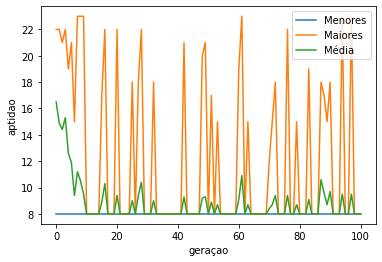

In [354]:
# MOSTRA GRÁFICO
# MOSTRAR O RESULTADO DE CADA GERAÇÃO
plt.plot(menores, label ='Menores')
plt.plot(maiores, label ='Maiores')
plt.plot(media, label ='Média')
plt.xlabel('geraçao')
plt.ylabel('aptidao')
plt.legend(loc=1)

In [355]:
# OBS: PARA OBTER RESULTADOS DIFERENTES DO MODELO E NECESSÁRIO AJUSTAR ALGUMAS VARIÁVEIS E PARAMETROS
# NÚMERO DE POPULAÇÃO, PROBABILIDADE DE CROSSOVER, PROBABILIDADE DE MUTAÇÃO, NÚMERO DE GERAÇÕES